# ERT simulation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert

### Invert 

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7ff83c54b6d0>)

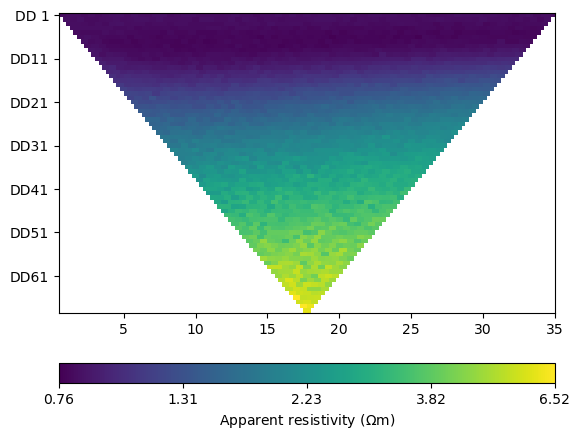

In [2]:
#mgr = ert.ERTManager('simple.dat')
data= pg.load('data/ERTLine.dat')
ert.showData(data, cMap='viridis')

In [3]:
xz = np.load('models/boundary.npy')

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7ff832de3e10>)

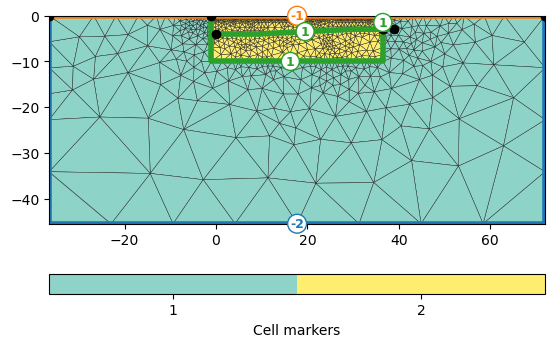

In [4]:
plc = mt.createParaMeshPLC(data, paraDepth=10, boundary=1)
line = mt.createPolygon(xz, marker=1)
plc += line
mesh = mt.createMesh(plc, quality=34.3)
pg.show(mesh, markers=True, showMesh=True)

In [5]:
mgr = ert.Manager(data)
mgr.setMesh(mesh)
mgr.invert(verbose=False)


20/04/24 - 22:22:36 - pyGIMLi - INFO - Found 2 regions.
20/04/24 - 22:22:36 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
20/04/24 - 22:22:36 - pyGIMLi - INFO - Creating forward mesh from region infos.
20/04/24 - 22:22:36 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
20/04/24 - 22:22:36 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4770 Cells: 9156 Boundaries: 7058
20/04/24 - 22:22:36 - pyGIMLi - INFO - Use median(data values)=1.39774567485903
20/04/24 - 22:22:36 - pyGIMLi - INFO - Created startmodel from forward operator: 1737, min/max=1.397746/1.397746


1737 [6.9625791936040295,...,12.028516177281466]

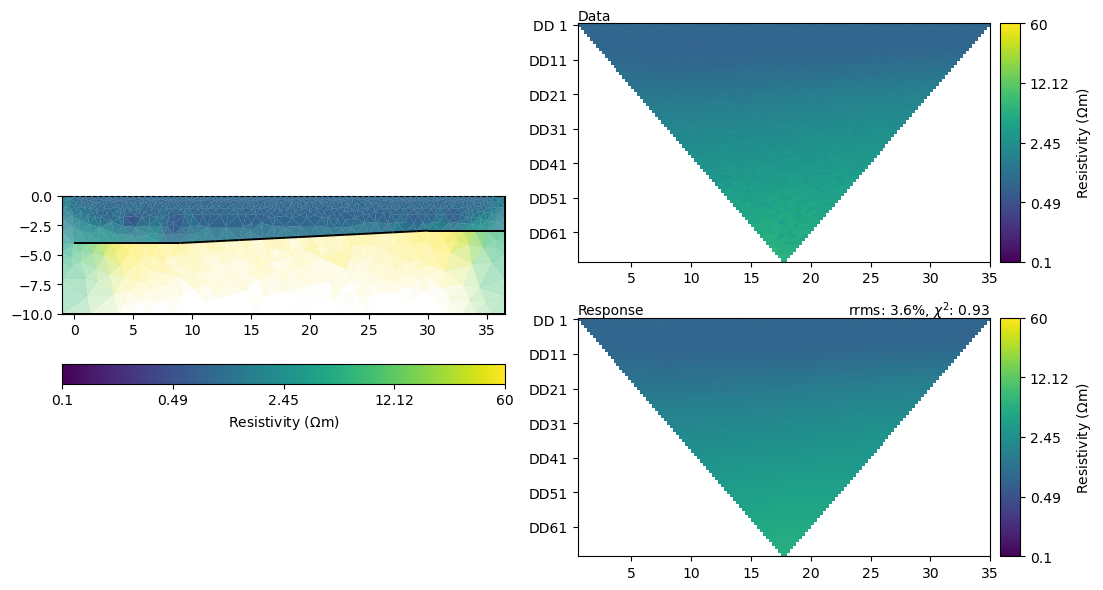

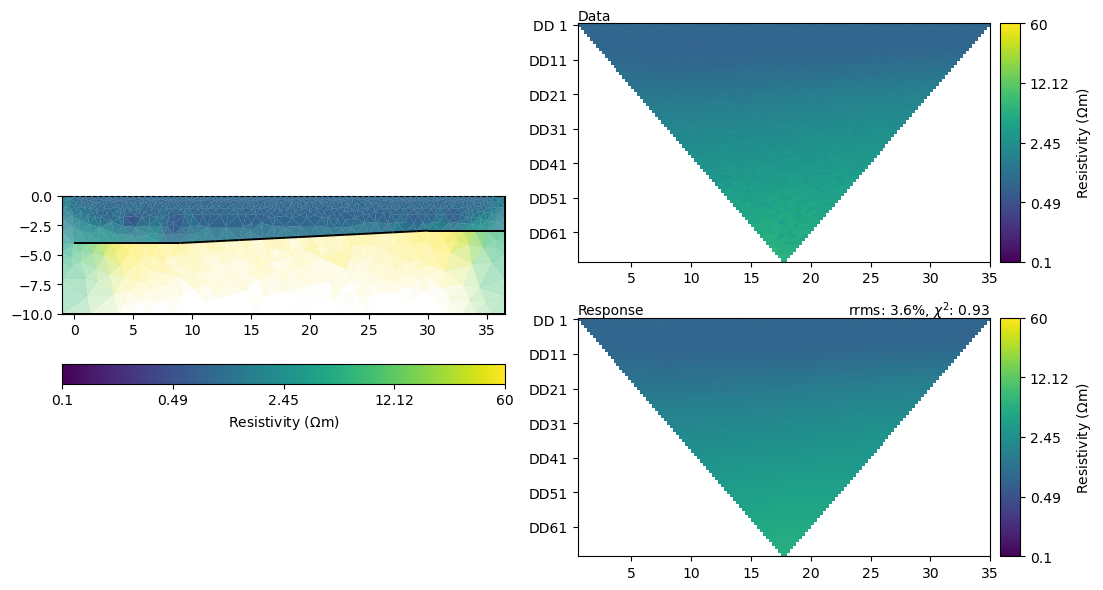

In [6]:
mgr.showResultAndFit(cMin=0.1, cMax=60, cMap='viridis')